## 作物数学模型参数的敏感性分析

进行作物数学模型参数的敏感性分析与不确定性评估是确保模型可靠性和有效性的关键步骤。以下是常用的方法和技术，可以帮助你分析模型参数的敏感性并评估模型的不确定性。

### 1. 敏感性分析方法

敏感性分析旨在确定哪些参数对模型输出的影响最大。常用的方法包括：

#### 1.1 局部敏感性分析

局部敏感性分析通过改变单个参数的值，观察模型输出的变化，从而评估该参数的敏感性。

- **方法**：
  - **一次一变法（One-at-a-Time, OAT）**：每次只改变一个参数的值，保持其他参数不变，观察模型输出的变化。
  - **偏导数法**：计算模型输出对每个参数的偏导数，评估参数的敏感性。

- **优点**：简单易懂，计算成本低。
- **缺点**：只能评估单个参数的影响，忽略了参数之间的相互作用。

#### 1.2 全局敏感性分析

全局敏感性分析通过同时改变多个参数的值，评估参数组合对模型输出的影响。

- **方法**：
  - **Monte Carlo模拟**：随机生成参数值的组合，运行模型多次，统计模型输出的变化。
  - **Sobol指数**：基于方差分解的方法，评估每个参数对模型输出方差的贡献。
  - **Morris方法**：通过在参数空间中进行有限步长的探索，评估参数的敏感性。
  - **Latin Hypercube Sampling (LHS)**：在参数空间中均匀采样，减少样本间的相关性。

- **优点**：考虑了参数之间的相互作用，提供了更全面的敏感性评估。
- **缺点**：计算成本较高，需要更多的计算资源。

### 2. 不确定性评估方法

不确定性评估旨在量化模型输出的不确定性，考虑数据质量和模型结构的局限性。

#### 2.1 数据不确定性评估

评估输入数据的不确定性对模型输出的影响。

- **方法**：
  - **误差传播分析**：通过传播输入数据的不确定性，评估模型输出的不确定性。
  - **Bootstrap方法**：通过重抽样技术生成多个数据集，评估模型输出的分布。

- **优点**：直接量化输入数据的不确定性。
- **缺点**：需要大量的数据和计算资源。

#### 2.2 模型结构不确定性评估

评估模型结构的不确定性，包括模型假设、参数化方法和模型形式的选择。

- **方法**：
  - **贝叶斯方法**：通过贝叶斯推理，评估模型参数的后验分布，量化模型结构的不确定性。
  - **多模型比较**：使用多个不同的模型结构，比较它们的性能，评估模型结构的不确定性。

- **优点**：提供了模型结构不确定性的全面评估。
- **缺点**：计算复杂，需要专业的统计知识。

### 3. 综合方法

结合敏感性分析和不确定性评估，可以更全面地理解模型的行为和可靠性。

- **方法**：
  - **综合敏感性-不确定性分析**：先进行敏感性分析，确定关键参数，再对这些参数进行不确定性评估。
  - **综合评估框架**：使用综合评估框架（如Meta-modeling、代理模型等），同时进行敏感性分析和不确定性评估。

### 示例代码


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17296\2002186191.py:64: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
c:\Python312\Lib\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)
c:\Python312\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Net Photosynthesis Rate Sensitivity Analysis:
{'S1': array([0.51957716, 0.08309784, 0.        , 0.18974984, 0.18690748]), 'S1_conf': array([0.06061284, 0.02373484, 0.        , 0.04114637, 0.03819573]), 'ST': array([0.53336105, 0.08296861, 0.        , 0.19765992, 0.19733862]), 'ST_conf': array([0.04752638, 0.00786936, 0.        , 0.02173946, 0.02071604]), 'S2': array([[            nan, -4.12111934e-04, -9.04523267e-04,
         3.20779059e-03,  6.23991906e-03],
       [            nan,             nan, -9.00975431e-05,
        -4.81591383e-04, -4.63670215e-04],
       [            nan,             nan,             nan,
         0.00000000e+00,  0.00000000e+00],
       [            nan,             nan,             nan,
                    nan, -1.40510405e-03],
       [            nan,             nan,             nan,
                    nan,             nan]]), 'S2_conf': array([[           nan, 8.08262276e-02, 8.09737920e-02, 9.10418154e-02,
        8.98282025e-02],
       [         

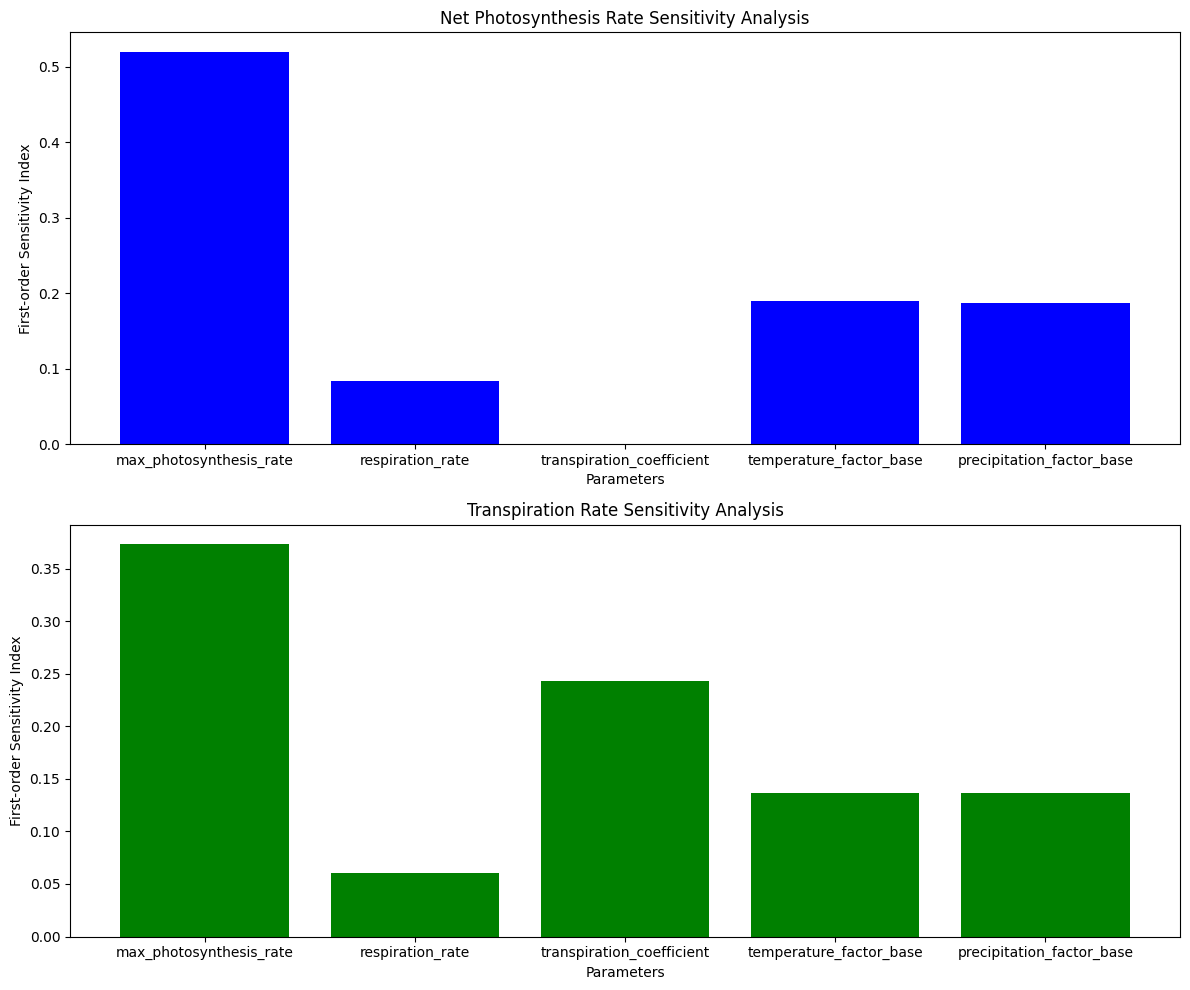

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
import pandas as pd

# 定义模型参数范围
param_ranges = {
    'max_photosynthesis_rate': (20, 40),
    'respiration_rate': (3, 7),
    'transpiration_coefficient': (0.03, 0.07),
    'temperature_factor_base': (0.8, 1.2),
    'precipitation_factor_base': (0.8, 1.2)
}

# 定义模型函数
def simulate_growth(params, temperature, light_intensity, water_content, precipitation):
    max_photosynthesis_rate = params[0]
    respiration_rate = params[1]
    transpiration_coefficient = params[2]
    temperature_factor_base = params[3]
    precipitation_factor_base = params[4]

    # 计算温度影响因子
    if temperature < 15:
        temperature_factor = temperature_factor_base * (0.5 + 0.05 * (temperature - 15))
    elif temperature > 35:
        temperature_factor = temperature_factor_base * (1.5 - 0.05 * (temperature - 35))
    else:
        temperature_factor = temperature_factor_base

    # 计算降水影响因子
    if precipitation < 50:
        precipitation_factor = precipitation_factor_base * (0.5 + 0.01 * (precipitation - 50))
    elif precipitation > 150:
        precipitation_factor = precipitation_factor_base * (1.5 - 0.01 * (precipitation - 150))
    else:
        precipitation_factor = precipitation_factor_base

    # 计算光合速率
    photosynthesis_rate = max_photosynthesis_rate * (light_intensity / 1000) * temperature_factor * precipitation_factor

    # 计算净光合速率
    net_photosynthesis_rate = photosynthesis_rate - respiration_rate

    # 计算蒸腾速率
    transpiration_rate = transpiration_coefficient * net_photosynthesis_rate

    return net_photosynthesis_rate, transpiration_rate

# 示例数据
temperature = 25  # 温度 (°C)
light_intensity = 500  # 光照强度 (μmol photons m-2 s-1)
water_content = 0.8  # 土壤水分含量 (m3 m-3)
precipitation = 100  # 降水量 (mm)

# 生成参数样本
problem = {
    'num_vars': 5,
    'names': ['max_photosynthesis_rate', 'respiration_rate', 'transpiration_coefficient', 'temperature_factor_base', 'precipitation_factor_base'],
    'bounds': [param_ranges[name] for name in param_ranges.keys()]
}

param_values = saltelli.sample(problem, 1000)

# 运行模型
Y_net_photosynthesis = []
Y_transpiration = []
for params in param_values:
    net_photosynthesis_rate, transpiration_rate = simulate_growth(params, temperature, light_intensity, water_content, precipitation)
    Y_net_photosynthesis.append(net_photosynthesis_rate)
    Y_transpiration.append(transpiration_rate)

# 进行敏感性分析
Si_net_photosynthesis = sobol.analyze(problem, np.array(Y_net_photosynthesis))
Si_transpiration = sobol.analyze(problem, np.array(Y_transpiration))

# 打印结果
print("Net Photosynthesis Rate Sensitivity Analysis:")
print(Si_net_photosynthesis)

print("\nTranspiration Rate Sensitivity Analysis:")
print(Si_transpiration)

# 可视化结果
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# 绘制净光合速率的敏感性分析结果
ax[0].bar(problem['names'], Si_net_photosynthesis['S1'], color='blue')
ax[0].set_title('Net Photosynthesis Rate Sensitivity Analysis')
ax[0].set_xlabel('Parameters')
ax[0].set_ylabel('First-order Sensitivity Index')

# 绘制蒸腾速率的敏感性分析结果
ax[1].bar(problem['names'], Si_transpiration['S1'], color='green')
ax[1].set_title('Transpiration Rate Sensitivity Analysis')
ax[1].set_xlabel('Parameters')
ax[1].set_ylabel('First-order Sensitivity Index')

plt.tight_layout()
plt.show()

### 解释

1. **参数范围**：定义了模型参数的取值范围。
2. **模型函数**：定义了模型的计算逻辑。
3. **参数样本生成**：使用Saltelli方法生成参数样本。
4. **模型运行**：对每个参数样本运行模型，记录净光合速率和蒸腾速率。
5. **敏感性分析**：使用Sobol方法进行敏感性分析，计算第一阶敏感性指数。
6. **结果打印与可视化**：打印敏感性分析结果，并绘制柱状图展示各个参数的敏感性。

通过这种方法，你可以系统地评估模型参数的敏感性和不确定性，从而提高模型的可靠性和准确性。